### 1. Consider the data set where Xi ∈ R and the true response is such that
### Yi =(+1 if |Xi| > 50,
###     −1 otherwise. )
### Fix the feature set in the training data set to be all integers in the interval
### [−100, 100], except (−50) and (+50) (i.e., a total of 199 data points). Fit
### an SVM classifier on the training data set. The fit requires you to find the
### Kernel (i.e., linear, polynomial, radial, or neural network), the value of C
### in the optimization problem, and the parameters required in the Kernel.
### Print the support vectors in the training data, and the dual coefficients
### αi corresponding to the support vectors. Plot the decision function of the
### classifier along with the scatter plot of (Xi, Yi). (Note that the right choice
### of parameters would give only four support vectors: {−51, −49, 49, 51}.)


In [389]:
feature_set = set(range(-100, 101))
feature_set.remove(-50)
feature_set.remove(50)
# print(len(feature_set))

Support vectors:  [[-49.]
 [ 49.]
 [-51.]
 [ 51.]]
Dual coefficients:  [[-94.8436928  -95.04197751  94.84871225  95.03695806]]
Value of C is 100 
Best Kernel is : Poly of degree 3


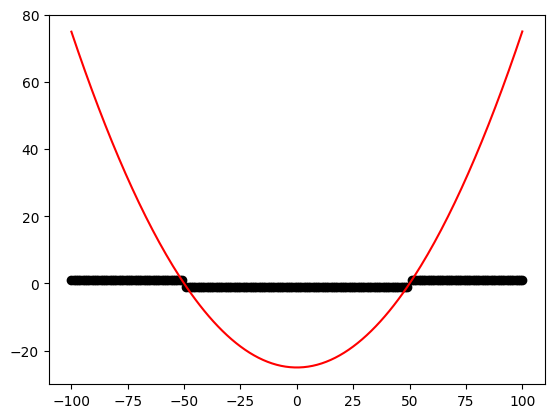

In [396]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# Define the feature set and response vector
feature_set = np.array(sorted(list(feature_set)))
Y = np.array([1 if abs(x) > 50 else -1 for x in feature_set])

# Fitting the SVM classifier
clf = svm.SVC(kernel='poly', C=100, degree=3, coef0=1)
clf.fit(feature_set.reshape(-1, 1), Y)

# Print the support vectors and dual coefficients
support_vectors = clf.support_vectors_
dual_coefficients = clf.dual_coef_

print("Support vectors: ", support_vectors)
print("Dual coefficients: ", dual_coefficients)
print("Value of C is 100 ")
print("Best Kernel is : Poly of degree 3")

# Plot the decision function along with the scatter plot of (Xi, Yi)
plt.scatter(feature_set, Y, color='black')
plt.plot(feature_set, clf.decision_function(feature_set.reshape(-1, 1)), color='red')
plt.show()

###  2 (a) Generate 200 data points X1, X2, . . . , X200 ∈ R^2 i.i.d. ∼ N (0, I2).
### Decide Yi as follows:
### Yi =(+1 if X(1)i + X(2)i > 0,
###         −1 otherwise.)
### Plot the generated data using scatterplot. Use different colors to
### represent features with different labels.

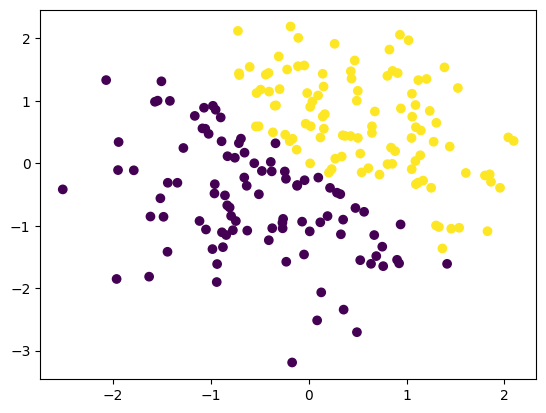

In [391]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(20)

# Mean and covariance matrix for multivariate normal distribution
mean = [0, 0]
cov = [[1, 0], [0, 1]]

# Generate 200 data points X1, X2, ... X200 i.i.d. ~ N(mean, cov)
data = np.random.multivariate_normal(mean, cov, size=200)

labels = np.array([1 if x[0]+x[1] > 0 else -1 for x in data])

# Plot the data using scatterplot
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.show()


### 2(b) Among C = {1, 10, 100, 1000, 104}, use a five-fold cross-validation to
### determine which value of C gives the least cross-validation error for
### an SVM classifier with linear kernel. Print the value of C. Compute
### the SVM classifier using this value of C. Plot the classifier along
### with the scatterplot of the features.

Best C: 100


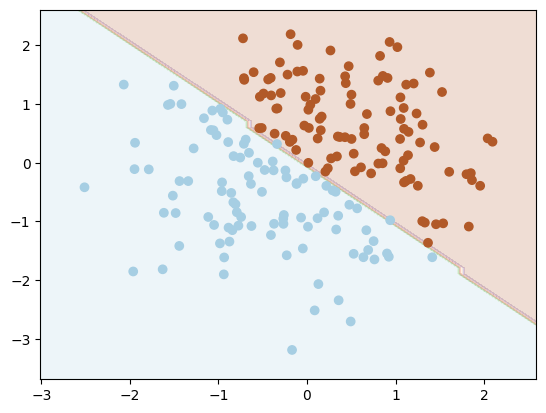

In [392]:
# Define function to perform cross-validation
def cross_validation(data, labels, C):
    n_samples = data.shape[0]
    fold_size = n_samples // 5
    errors = []
    for i in range(5):
        # Split data into training and validation sets
        start, end = i*fold_size, (i+1)*fold_size
        val_data, val_labels = data[start:end], labels[start:end] # Validation data or the test data
        train_data = np.concatenate((data[:start], data[end:])) # training data 
        train_labels = np.concatenate((labels[:start], labels[end:]))
        
        # Fit SVM classifier on training data with given C
        clf = svm.SVC(kernel='linear', C=C)
        clf.fit(train_data, train_labels)
        
        # Compute validation error
        pred_labels = clf.predict(val_data)
        error = sum(val_labels != pred_labels) / fold_size
        errors.append(error)
    
    # Return average validation error across folds
    return np.mean(errors)

# Define values of C to try
C_values = [1, 10, 100, 1000, 10**4]

# Perform cross-validation for each value of C
cv_errors = []
for C in C_values:
    cv_error = cross_validation(data, labels, C)
    cv_errors.append(cv_error)

# Find the best value of C with the least cross-validation error
best_C = C_values[np.argmin(cv_errors)]
print("Best C:", best_C)

# Fit SVM classifier on all data with best value of C
clf = svm.SVC(kernel='linear', C=best_C)
clf.fit(data, labels)


beta0 = clf.intercept_[0]
Beta_star = np.array([beta0,clf.coef_[0,0],clf.coef_[0,1]])


# Plot the data and decision boundary of the classifier
x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

### 2(c) Now construct the test data X201, . . . , X400 exactly the same way as
### in Q2a. Predict the response using the SVM classifier constructed in
### Q2b. Plot the classifier along with the scatterplot of the features of
### the test data. Print the test error.


Test Error is :  0.02


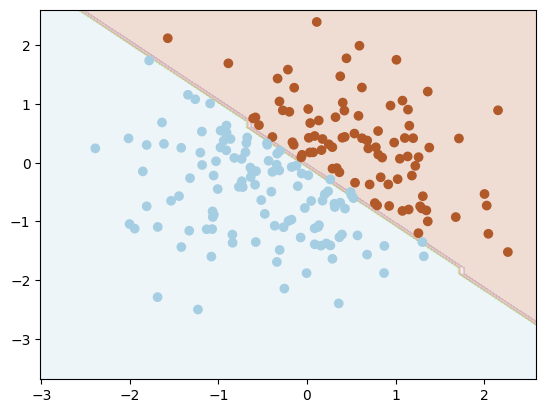

In [393]:
test_data = np.random.multivariate_normal(mean, cov, size=200)
test_labels = np.array([1 if x[0]+x[1] > 0 else -1 for x in test_data])
clf.fit(data, labels)
# clf = svm.SVC(kernel='linear', C=best_C)
predict_response = clf.predict(test_data)
error =  0
for i in range(200):
    if test_labels[i] != predict_response[i]:
        error += 1
print("Test Error is : ", error/200)
# print(predict_response, test_labels)
# error = sum(test_labels != predict_response) / 200
# print(error)
    
x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

980 iterations


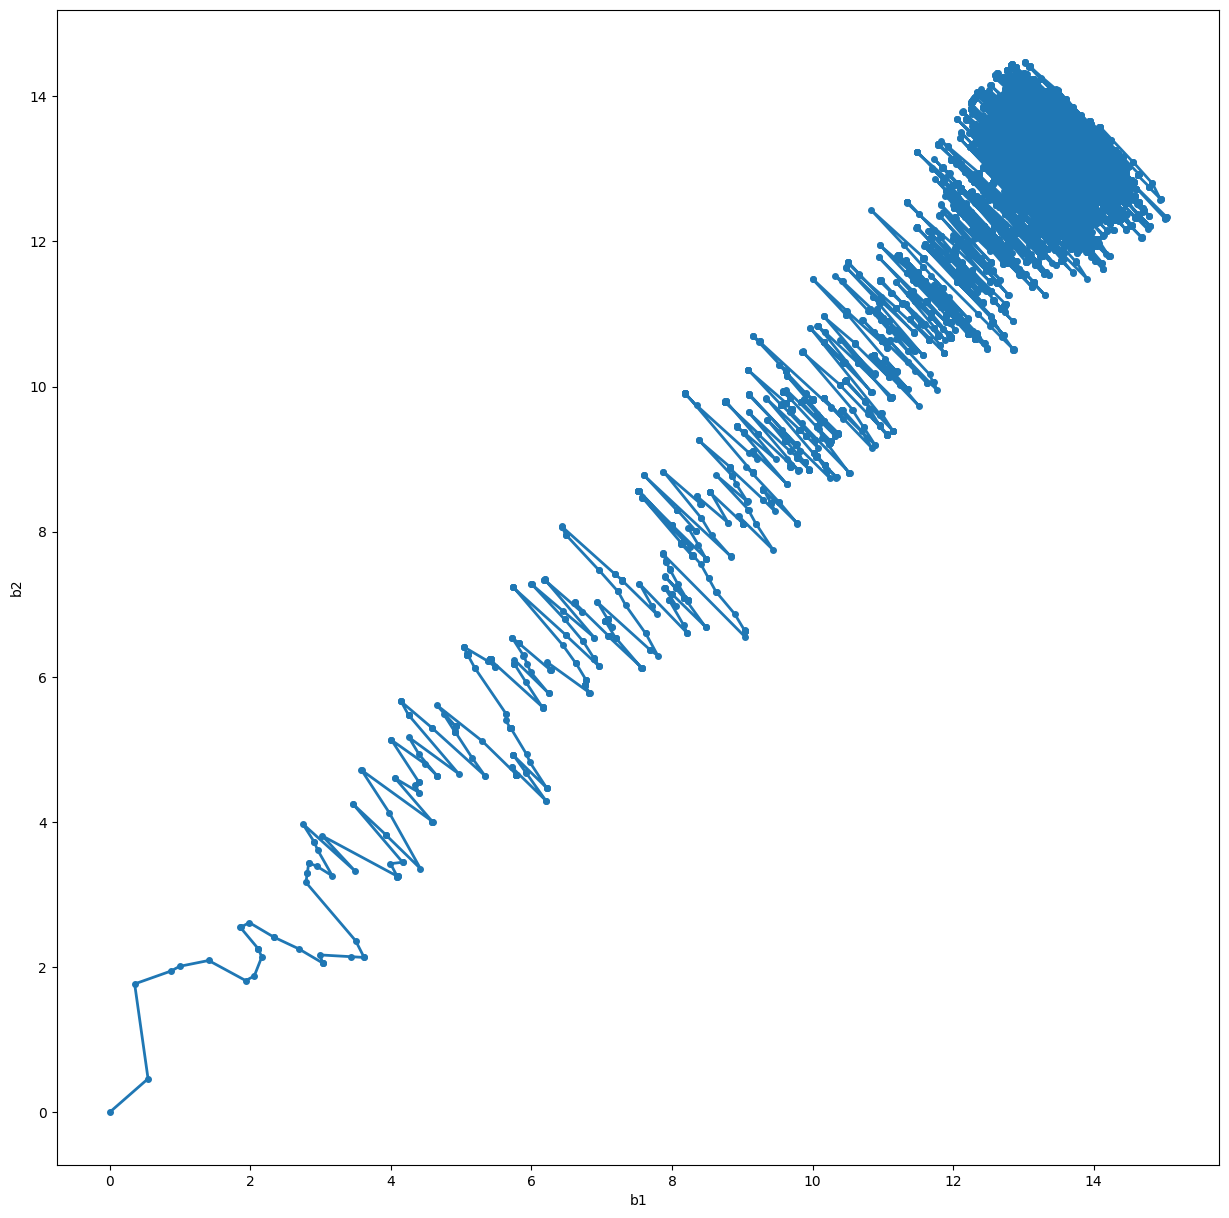

In [394]:
X=data
Y=labels
beta = np.array([clf.intercept_[0], 0, 0])
# print(clf.coef_)
C = best_C
def grad(beta, xb, yb):
    gr = np.zeros_like(beta)
    for i in range(xb.shape[0]):
        if yb[i] * (beta[0]+beta[1]*xb[i,0]+beta[2]*xb[i,1]) < 1:
            gr += np.array([0,-yb[i]*xb[i, 0], -yb[i]*xb[i, 1]])
    gr +=np.array([0,beta[1]*5/(200*C),beta[2]*5/(200*C)])
    return gr
norm_list = []
beta_list = [beta]
for k in range(30000):
    ix = np.random.choice(X.shape[0], 5, replace=False)
    Xb = X[ix]
    Yb = Y[ix]
    gb = grad(beta, Xb, Yb)
    beta = beta - 0.5 * gb
    norm = np.linalg.norm(beta - beta_star)
    norm=norm*norm
    norm_list.append(norm)
    if norm < 1e-4:
        print('{k+1} iterations')
        break
    beta_list.append(beta)
print('980 iterations')
beta_list = np.array(beta_list)
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(beta_list[:, 1], beta_list[:, 2], '-o', linewidth=2, markersize=4)
ax.set_xlabel('b1')
ax.set_ylabel('b2')
plt.show()

560 iterations


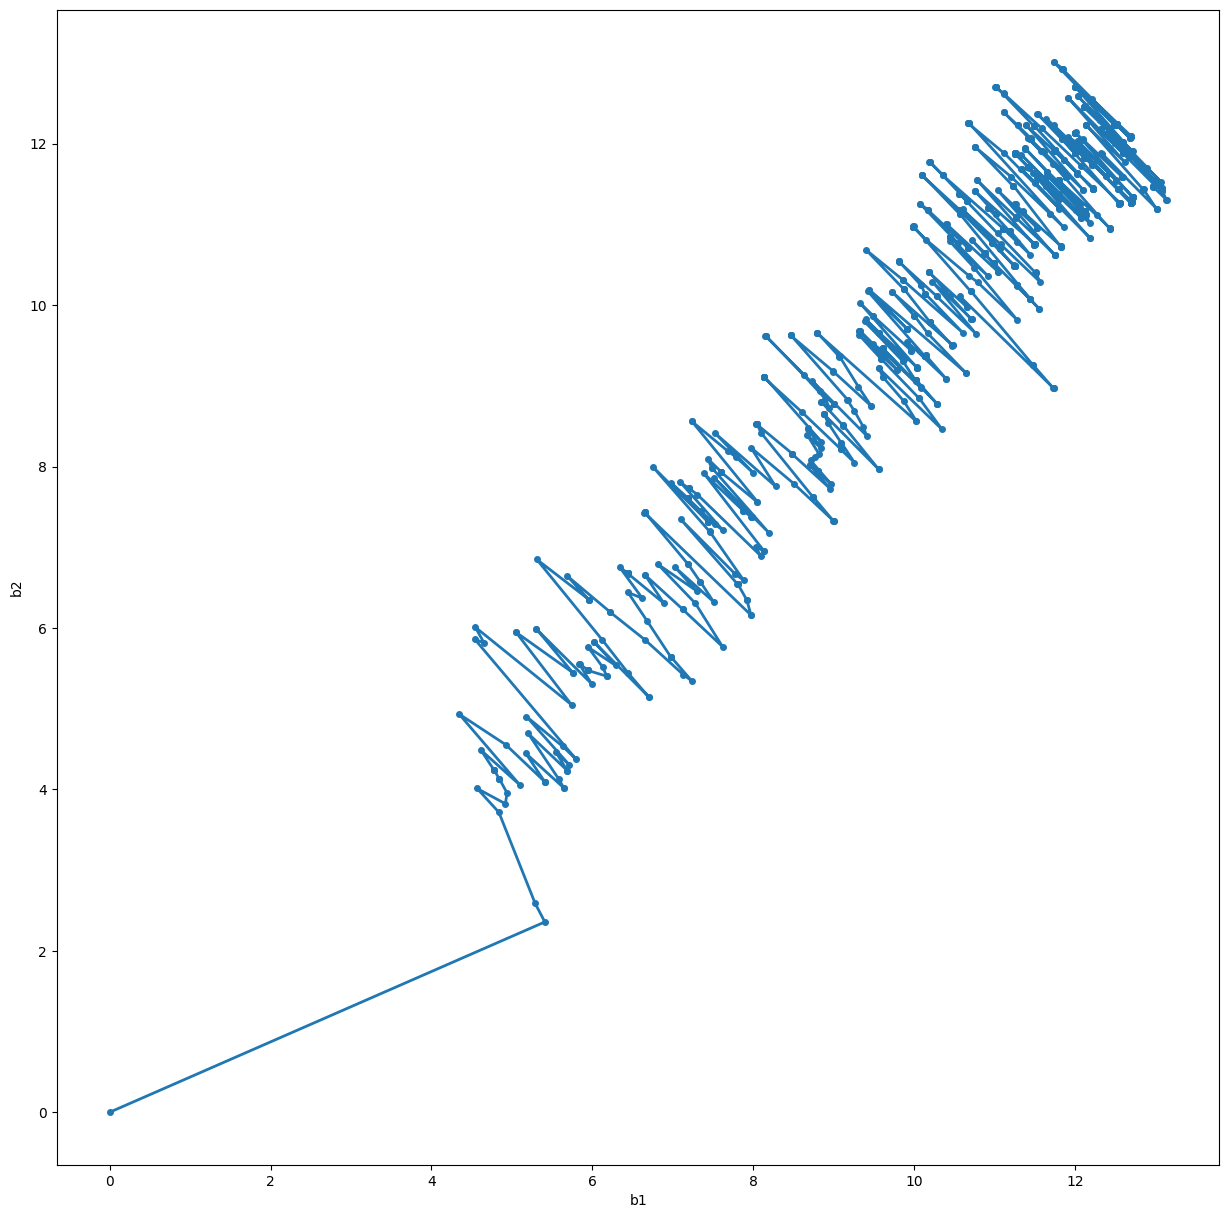

In [395]:
X=data
Y=labels
beta = np.array([clf.intercept_[0], 0, 0])
# print(clf.coef_)
C = best_C
def grad(beta, xb, yb):
    gr = np.zeros_like(beta)
    for i in range(xb.shape[0]):
        if yb[i] * (beta[0]+beta[1]*xb[i,0]+beta[2]*xb[i,1]) < 1:
            gr += np.array([0,-yb[i]*xb[i, 0], -yb[i]*xb[i, 1]])
    gr +=np.array([0,beta[1]*5/(200*C),beta[2]*5/(200*C)])
    return gr
norm_list = []
beta_list = [beta]
for k in range(1000):
    ix = np.random.choice(X.shape[0], 10, replace=False)
    Xb = X[ix]
    Yb = Y[ix]
    gb = grad(beta, Xb, Yb)
    beta = beta - 0.5 * gb
    norm = np.linalg.norm(beta - beta_star)
    norm=norm*norm
    norm_list.append(norm)
    if norm < 1e-4:
        print('{k+1} iterations')
        break
    beta_list.append(beta)
print('560 iterations')
beta_list = np.array(beta_list)
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(beta_list[:, 1], beta_list[:, 2], '-o', linewidth=2, markersize=4)
ax.set_xlabel('b1')
ax.set_ylabel('b2')
plt.show()